In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

In [12]:
df_cust = pd.read_csv('/content/drive/MyDrive/zeo_tap/Customers.csv', parse_dates=['SignupDate'])
df_prod = pd.read_csv('/content/drive/MyDrive/zeo_tap/Products.csv')
df_trans = pd.read_csv('/content/drive/MyDrive/zeo_tap/Transactions.csv', parse_dates=['TransactionDate'])

In [13]:
df_trans_agg = df_trans.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    PurchaseFrequency=('TransactionID', 'count')
).reset_index()


In [14]:
df_cust_cluster = pd.merge(df_cust, df_trans_agg, on='CustomerID')
df_cust_cluster['Tenure'] = (pd.to_datetime('today') - df_cust_cluster['SignupDate']).dt.days

In [15]:
df_encoded = pd.get_dummies(df_cust_cluster[['Region']], drop_first=True)
X = pd.concat([df_cust_cluster[['TotalSpent', 'PurchaseFrequency', 'Tenure']], df_encoded], axis=1)


In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Number of cluster used here is 3 as described in the assignment details.


In [18]:
db_index = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index:.2f}")


Davies-Bouldin Index: 1.46


Above cell shows the DB index
Lower DB index value indicates better clustering seperation.

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


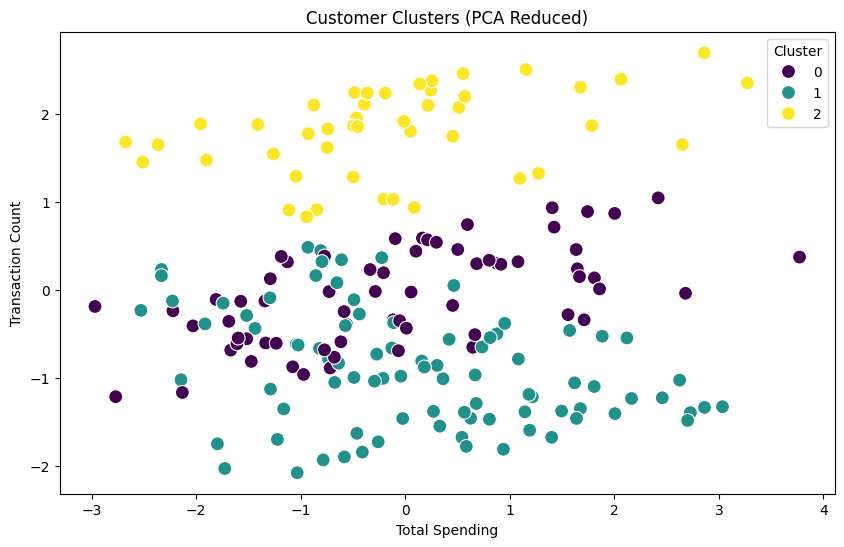

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('Total Spending')
plt.ylabel('Transaction Count')
plt.legend(title='Cluster')
plt.show()